# Exercise session nº 3
---
# Geometry, epistasis, and developmental patterning


This subject is extracted from : 
> Françis Corson, Eric Siggia, *Geometry, epistasis, and developmental patterning*, PNAS, 2012.
> https://doi.org/10.1073/pnas.1201505109

And the implementation is inspired from :
> Lisa Bedin https://colab.research.google.com/drive/1X7hAimJ12D7iA98kBdbmEGOnWw5VAYHP?usp=sharing 



 During development, cells or tissues become competent when they can sense signals that direct them toward a particular fate; they are specified or committed to a fate when the signal can be removed with no change in outcome. Cells are determined when they cannot be directed to alternative fates by other signals. Differentiation ensues when specialized gene batteries are induced along with characteristic morphology. None of these concepts can be tested in a completely controlled way in vivo, and the recent creation of induced pluripotent stem cells shows that even differentiation can be reversed. 

These concepts admit a natural __geometric representation__, which can be formalized in the language of dynamical systems, also called the geometric theory of differential equations. When the molecular details are not accessible, a system’s __effective behavior__ may be represented in terms of a small number of aggregate variables, and qualitatively different behaviors enumerated according to the geometrical structure of __trajectories__ or __topology__. The fates that are accessible to a cell are associated with __attractors__ — the valleys in Waddington’s “epigenetic landscape” - to which neighboring trajectories converge.


![alt text](Images/Waddington.png "Title")

The description of cellular differentiation with energy landscapes dates from __Conrad Hal Waddington__, a founding father of __epigenetics__, who viewed the evolution as a process happening via mutations of the genes involved in the developpment. The energy landscape in which the cells lived was determined by the genome of the individual. Thus mutation would affect the landscapes, and thus affect cellular states. 

>__Epigenetics :__ The study of changes in organisms caused by modification of gene expression rather than alteration of the genetic code itself.

>__Epistasis :__ When one or several genes avoid the expression of other genes

>__Hypomorph :__ A type of mutation in which the altered gene product possesses a reduced level of activity

>__Autocrine :__ Denoting or relating to a cell-produced substance that has an effect on the cell by which it is secreted.

>__Differentiation :__ Process through which cells specialized themselves into a given cell-type


Developmental signaling networks are indeed composed of dozens of components whose interactions are very difficult to quantify in an embryo. The authors of the paper model the discrete hierarchy of phenotypic models using energy landscapes. This model encompasses both signaling and commitment, and allows to predict the correlated cell fate probabilities for a cross between any two backgrounds/conditions.  The two signaling pathways are combined additively, without interactions, and epistasis only arises from the nonlinear dynamical flow in the landscape defined by the geometric model.

The biological example considered here is the vulva of the nematode C. Elegans, in which two signaling pathways are integrated : Induction by __EGF__ and lateral signaling through __Notch__. The genetic experiments seems to indicate a mutual pathway repression. This model fits these experimental data, but also quantifies the contributions of extrinsic vs. intrinsic sources of noise in the penetrance of mutant phenotypes in signaling hypomorphs.


![alt text](Images/Graphical_abstract.png "Title")

During this session, we will model the energy landscape described in the paper and make several predictions from this model, linked to biological data.

---

# 0 - Landscape topology

![alt text](Images/Topologies.png "Title")

There are three possible topologies of the landscape. The landscape of the right is choosen to model vulval patterning based on experimental data. 
All transitions between two fates are permissible, there is a central source (__open circle__) and saddles (__crosses__) between each pair of fate.

### Governing equations :
The state of each cell is parametrized by a two-dimensional vector $\vec{r} = x\vec{e}_x + y \vec{e}_y$ and its dynamics are defined as follows :

$
\begin{align}
\vec{f}(\vec{r}) &= 2 \vec{r} + c_2[-2x\vec{e}_x + (y^2 + x^2)\vec{e}_y] \newline
\frac{d\vec{r}}{dt} &= \frac{1}{\tau}[\vec{\sigma}_1(\vec{f}(\vec{r}) + \vec{m}) - \vec{r}] + \vec{\eta}(t) \newline
\vec{\sigma}_1 &= tanh(||\vec{f}||)\frac{\vec{f}}{||\vec{f}||} \newline
\vec{m} &= \vec{m}_0 + l_1 \vec{m}_1 + l_2 \vec{m}_2 \newline
\left< \eta_i(t) \eta_j(t')\right> &= 2D \delta_{ij} \delta(t-t')
\end{align}
$

$\vec{f}(\vec{r})$ is the term in the equations that make the dynamics multistable.

### Initial conditions : 

We assume that the initial state is monostable. Thus we remove the term $\vec{f}$ from the equations that maked them multistable. The dynamics are given by : 

$
\dfrac{d\vec{r}}{dt} = \frac{1}{\tau}[\vec{\sigma}_1(\vec{m}_0) - \vec{r}] + \vec{\eta}(t) $

### __Question 1__
> What is the steady state of the initial distribution of $\vec{r}$ ?

__*Correction*__ at steady state, $\vec{r} = \vec{\sigma}_1(\vec{m}_0) + \tau \vec{\eta}$, It is thus drawn from a gaussian distribution $\mathcal{N}(\vec{\sigma}_1(\vec{m}_0), 2D \tau)$

### __Question 2__
> Discretize the equation with a forward euler-scheme. from which distribution do you draw $\eta$ at discrete times ? 

__*Correction*__ We call the timestep $\Delta t$. Thus $t_n = n\Delta t$

$\vec{r}(t_{n+1}) = \vec{r}(t_n)(1-\frac{\Delta t}{\tau}) + \frac{\Delta t}{\tau}(\vec{\sigma}_1(\vec{f}(t_n) + \vec{m}) + \vec{\eta}_n)$

We have $\eta_i^n = \int_{(n-1)\Delta t}^{n\Delta t}\eta_i(t)dt$, thus : 

$
\begin{align}
\left<\eta_i^n \right> &= \left<\int_{(n-1)\Delta t}^{n\Delta t}\eta_i(t)dt \right> = \int_{(n-1)\Delta t}^{n\Delta t}\left< \eta_i(t) \right> = 0 \newline
\left<\eta_i^n \eta_j^m \right> &= \left<  \int_{(n-1)\Delta t}^{n\Delta t}\eta_i(t)dt \int_{(m-1)\Delta t}^{m\Delta t}\eta_j(t')dt' \right>  \newline
\left<\eta_i^n \eta_j^m \right> &= \left<  \int_{(n-1)\Delta t}^{n\Delta t} \int_{(m-1)\Delta t}^{m\Delta t} \eta_i(t)\eta_j(t')dtdt' \right>  \newline
\left<\eta_i^n \eta_j^m \right> &=  \int_{(n-1)\Delta t}^{n\Delta t} \int_{(m-1)\Delta t}^{m\Delta t} \left<\eta_i(t)\eta_j(t') \right> dtdt' \newline
\left<\eta_i^n \eta_j^m \right> &=  \int_{(n-1)\Delta t}^{n\Delta t} \int_{(m-1)\Delta t}^{m\Delta t} 2D \delta(t-t') \delta_{ij} dtdt' \newline
\left<\eta_i^n \eta_j^m \right> &=  \int_{(n-1)\Delta t}^{n\Delta t}  2D \delta(m-n) \delta_{ij} dt \newline
\left<\eta_i^n \eta_j^m \right> &=  2D \Delta t \delta(m-n) \delta_{ij} \newline
\end{align}
$

Thus $\eta \mapsto \mathcal{N}(0,2D \Delta t)$

In [1]:
from utils import *

import numpy as np # Numerical computing library
import matplotlib
import matplotlib.pyplot as plt # Plotting library

In [2]:
#The given parameters are infered from biological data. 
#A big part of the study was to determine all these parameters from the experiments. 
#We will only give the phenotypical landscapes 

tau = 1./2.18
D = 0.16**2/4.
c2 = 1


def sigmaonefunc(x):
    norm = np.linalg.norm(x)
    sigma = np.tanh(norm)*x/norm
    return(sigma)


def f(r):
    s = 2*r
    x,y = r
    e1 = np.array([1,0])
    e2 = np.array([0,1])
    s-=e1*c2*(2*x*y)
    s+=e2*c2*(y**2-x**2)
    return(s)

# I - Unbiased Dynamics

We want to find the fixed points of the energy landscape. We will consider the situation without noise $(\eta = 0)$ and without bias $(\vec{m}=0)$

$
\dfrac{d\vec{r}}{dt} = \dfrac{1}{\tau}[\vec{\sigma}_1(\vec{f}(\vec{r}) - \vec{r}]$

### __Question 3__
> Integrate and plot these dynamics with $t\in[0,20]$ from the given initial conditions. How many basins do you find ? Find the coordinates of the basins from these dynamics.

__Tip :__ You can do an euler scheme or use _scipy.integrate.odeint_ to find the trajectories.

__*Correction*__ 

In [3]:
import scipy.integrate

#This function works by defining a function func(r,t) giving the value of dr/dt, and the timepoints. 

def dynamic_unbiased(r, t):
    f_value = f(r) 
    sigma1 = sigmaonefunc(f_value)
    return (sigma1 - r) / tau

time = np.linspace(0, 20, 1000)
initial_conditions = [(.0001, .0001), (.0001, -.0001), (-.0001, .0001), (-.0001, -.0001), (-0.001,0),(0.001,0),(1e-6,-0.001),(-1e-6,-0.001)]

# Do the simulations.
# Remember that we define f as the partial application of cellular_switch. 
trajectory = {}
for j, ic in enumerate(initial_conditions):
    trajectory[j] = scipy.integrate.odeint(dynamic_unbiased, y0=ic, t=time)

Converging points : [[-0.86156 -0.49742]
 [-0.       0.99485]
 [ 0.86156 -0.49742]]


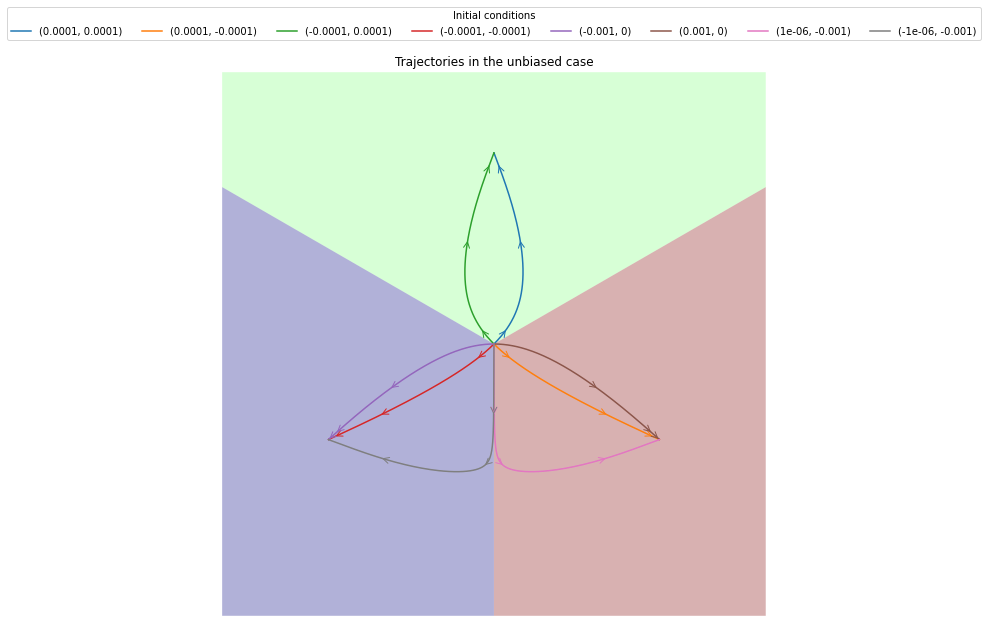

In [4]:
# Draw the trajectories. 

fig,ax = plot_voronoi_setup()
for j,ic in enumerate(initial_conditions):
    l=plt.plot(trajectory[j][:,0],trajectory[j][:,1],label = ic)
    add_arrow(l[0])
    
plt.xlim(-np.sqrt(2),np.sqrt(2))
plt.ylim(-np.sqrt(2),np.sqrt(2))
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(title = "Initial conditions",loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=8)
plt.title("Trajectories in the unbiased case")

converging_points = np.array([trajectory[k][-1] for k in range(len(trajectory))])
converging_points = np.unique(converging_points.round(5),axis=0)
print("Converging points :",converging_points)

### Phase Diagram : Basins of attraction

We now want to have a representation of the energy landscape by computing a vector field of the dynamics at each point. The vector field should lead to one of the basins established before. More concretely, we will plot the vector field $\dfrac{dr}{dt}$ on the grid $[-\sqrt{2},\sqrt{2}]^2$.

To do that, we will evaluate the vector field at each point of a discretized square grid Z , and use matplotlib.pyplot.streamplot to plot it.

In [5]:
# We determine the x and y points of the grid

xlist20 = np.linspace(-np.sqrt(2), np.sqrt(2), 20)
ylist20 = np.linspace(-np.sqrt(2), np.sqrt(2), 20)

# We determine the values of the vector field on this grid
X20, Y20 = np.meshgrid(xlist20, ylist20)
Z20 = np.zeros((20,20,2))

for a,b in np.ndindex(X20.shape):
    x, y = X20[a,b],Y20[a,b]
    Z20[a,b] = dynamic_unbiased(np.array([x,y]), 0)

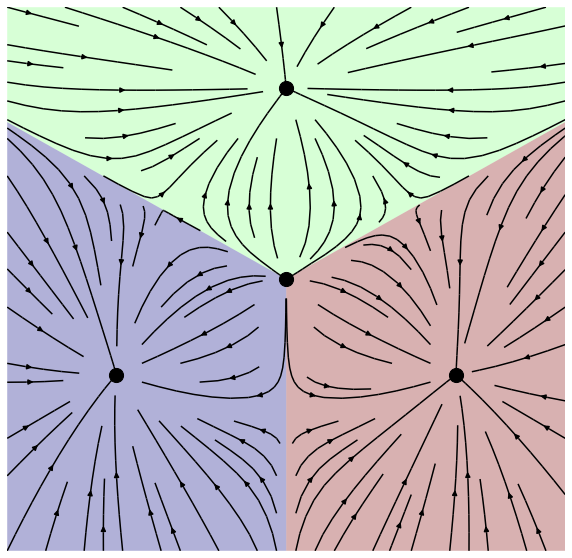

In [6]:
fig,ax = plot_voronoi_setup(plot_bassins=True,markersize=200)
plt.streamplot(X20, Y20, Z20[:,:,0], Z20[:,:,1],color = 'black', linewidth = 1.5,density = 1)
plt.show()

# II - Biased Dynamics

Now we work with biased dynamics $\vec{m} \neq \vec{0}$. We have : 

$
\begin{align}
\frac{d\vec{r}}{dt} &= \frac{1}{\tau}[\vec{\sigma}_1(\vec{f}(\vec{r}) + \vec{m}) - \vec{r}] + \vec{\eta}(t) \newline
\vec{m} &= \vec{m}_0 + l_1 \vec{m}_1 + l_2 \vec{m}_2 \newline
\end{align}
$

Where $\vec{m}_0$ represent the natural tendency to go to a 3° fate, $\vec{m}_1$ represent the EGF signaling, leading to the 1° fate, and $\vec{m}_2$ represent the Notch signaling, leading to the 2° fate.

These biased dynamics obviously change the topological landscape that was observed previously. We will determine these new landscapes by plotting the vector field of the dynamics, as before. 

In [7]:
stationary = np.array([[-0.86156317, -0.49742373],[ 0.86156317, -0.49742373],[1.60591136e-14, 9.94847458e-01]])

In [8]:
m0_norm = 0.39
m1_norm = 4.60
m2_norm = 5.97

m0 = m0_norm * stationary[0] / np.linalg.norm(stationary[0])  # fate 3°
m1 = m1_norm * stationary[1] / np.linalg.norm(stationary[1])  # EGF signaling
m2 = m2_norm * stationary[2] / np.linalg.norm(stationary[2])  # Notch signaling
m0, np.linalg.norm(m0), np.linalg.norm(stationary[0]), np.linalg.norm(stationary[1]), np.linalg.norm(stationary[2])
m_norm_max = np.max([m0_norm, m1_norm, m2_norm])

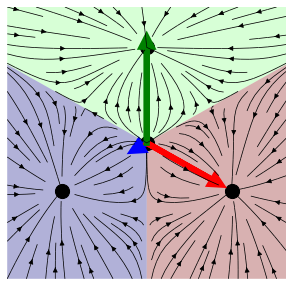

In [9]:
fig,ax = plot_voronoi_setup(plot_bassins=True, figsize=(5,5))
plt.streamplot(X20, Y20, Z20[:,:,0], Z20[:,:,1],color = "k",linewidth=0.75)

lw = 6

plt.arrow(0., 0.,m0[0]/m_norm_max, m0[1]/m_norm_max, head_width=0.1, head_length=0.1, color='b',linewidth=lw) # fate 3°
plt.arrow(0., 0.,m1[0]/m_norm_max, m1[1]/m_norm_max, head_width=0.1, head_length=0.1, color='r',linewidth=lw) # EGF signaling
plt.arrow(0., 0.,m2[0]/m_norm_max, m2[1]/m_norm_max, head_width=0.1, head_length=0.1, color='g',linewidth=lw) # Notch signaling

### Phase Diagram : Basins of attraction

### __Question 4__

> Write the derivative function in the case of the biased dynamics. Plot the vector field of the dynamics for each scenario, as was done before un the case of unbiased dynamics. What do you observe ?

<img src="Images/bassins.png" alt="drawing" width="1000"/>

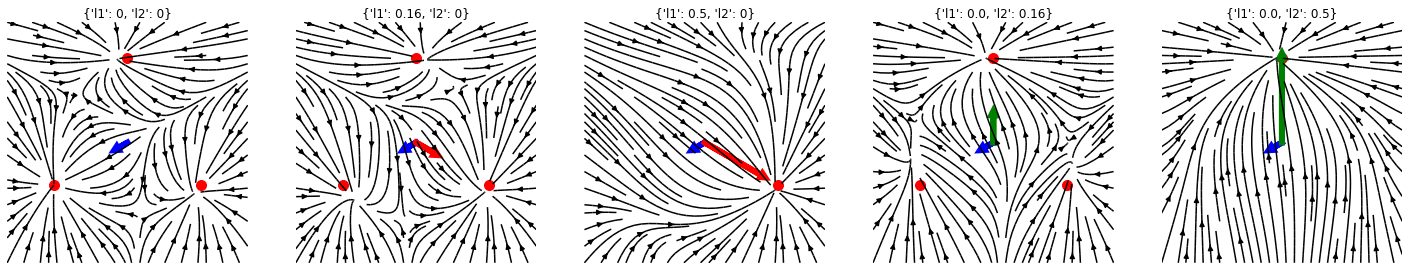

In [10]:
def dynamic_biased(r, t, l1, l2):
    f_value = f(r) 
    m_value = m0 + l1 * m1 + l2 * m2
    sigma1 = sigmaonefunc(f_value + m_value)
    return (sigma1 - r) / tau

scenarios = [
    {'l1': 0, 'l2': 0},
    {'l1': 0.16, 'l2': 0},
    {'l1': 0.5, 'l2': 0},
    {'l1': 0., 'l2': 0.16},
    {'l1': 0., 'l2': 0.5}
    ]

fig, ax = plt.subplots(1,5,figsize=(25,10))

points_plotted = [[0,1,2],[0,1,2],[1],[0,1,2],[2]]


for j,params in enumerate(scenarios) : 

    l1, l2 = [params[key] for key in ["l1","l2"]]
    
    Z20 = np.zeros((20,20,2))

    for a,b in np.ndindex(X20.shape):
        x, y = X20[a,b],Y20[a,b]
        Z20[a,b] = dynamic_biased(np.array([x,y]), 0,l1,l2)
    
    ax[j].streamplot(X20, Y20, Z20[:,:,0], Z20[:,:,1],color = 'black', linewidth = 1.5,density = 1)
    ax[j].scatter(stationary[points_plotted[j]][:,0],stationary[points_plotted[j]][:,1],color='red',s=100)
    ax[j].arrow(0., 0.,2*m0[0]/m_norm_max, 2*m0[1]/m_norm_max, head_width=0.05, head_length=0.05, color='b',linewidth=lw) # fate 3°
    if l1>0 : 
        ax[j].arrow(0., 0.,2*l1*m1[0]/m_norm_max, 2*l1*m1[1]/m_norm_max, head_width=0.05, head_length=0.05, color='r',linewidth=lw) # EGF signaling
    if l2>0 : 
        ax[j].arrow(0., 0.,2*l2*m2[0]/m_norm_max, 2*l2*m2[1]/m_norm_max, head_width=0.05, head_length=0.05, color='g',linewidth=lw) # Notch signaling
    ax[j].set_aspect('equal')
    ax[j].axis('off')
    ax[j].set_title(params)


https://en.wikipedia.org/wiki/Euler–Maruyama_method
Euler Maruyama : Extension of euler method to stochastic differential equations : Quite natural but also theoretically grounded !

# III - Vulval Precursor Cells (VPCs) Trajectories

C-Elegans is a nematode that has an invariange lineage pattern : the cells always divide in the same way to form the same lineage tree in the normal development. Thus, mutations alterating this lineage provide important informations about the mechanisms involved to obtain these fates.

The vulva of Caenorhabditis elegans forms from a row of vulval precursor cells (VPCs), which are competent to adopt three possible fates : 

- 1° in red, induced by EGF from the neighboring anchor cell (AC)
- 2° in green, induced by Notch lateraly among VPCs
- 3° in blue, in absence of induction

The pattern of fates among the daugthers of these precursors cells is shown on the figure bellow. When development is perturbed, other patterns of the three fates are obtained, often with variable results for genetically identical animals. Thus experimental outcomes are described as probabilities. We will show how modifying the previous landscape according to these mutations allows to retrieve experimental features.

<img src="Images/VPC.png" alt="drawing" width="500"/>

We will integrate the dynamics of the five cells P4,P5,P6,P7,P8 at each time points. 
From the previous situation, we now need to integrate the interaction between several cells through EGF and Notch. for EGF : 

#### EGF signaling

The EGF signal is fixed and decreases exponentially with the distance from the anchor cell (AC): 

$l_1 = l_1^0 \times [\gamma^2, \gamma, 1, \gamma, \gamma^2]$ respectively, for $[P4.p,P5.p,P6.p,P7.p,P8.p]$

#### Notch signaling

On the other hand, the lateral signal emitted by each VPC depends on its current state. The lateral signal is defined by a function $L_2(\vec{r})$ which varies as a sigmoid from zero to one when $\vec{r}$ crosses a threshold line that runs diagonally through the 3°, 1° domains.

$\begin{align}
L_2(\vec{r}) &= \sigma_2(n_0 + \vec{n}_1 \cdot \vec{r}) \newline
\sigma_2(u) &= \dfrac{1+\text{tanh}2u}{2}
\end{align}$

To relate the signal, L2, produced by a cell and its neighbors to Notch signaling, l2, in that cell, we introduce a ratio α to para- meterize the relative importance of autocrine and paracrine sig- naling (14) (Notch ligands or Deltas include both transmembrane and diffusible ligands; ref. 15). Thus for P6.p:

$l_2(P6.p) = \alpha L_2(P6.p) + L_2(P5.p) + L_2(P7.p)$

### __Question 5__

> With a forward-Euler scheme, integrate and plot the trajectories of the five VPC in the case of normal (WT) development. 

Discretizing with the Euler method a stochastic differential equation is called a the Euler-Maruyama method. 

https://en.wikipedia.org/wiki/Euler–Maruyama_method This is quite natural to do so but also theoretically grounded !

In [11]:
gamma = 0.16
alpha = 1.14
n0 = -1.23
rot1 = -48.28 * np.pi / 180.
n1_norm = 3
n1 = n1_norm * np.array([np.cos(rot1), np.sin(rot1)])
n1_normal = np.array([np.sin(rot1), -np.cos(rot1)])
l1_over = 7.39
l1_lin = 0.55

### Notch Ligand line : 

$$l_2 = \frac{\alpha}{2}(1+\tanh(2 (n_0 +\overrightarrow{n_1} \cdot \overrightarrow{r}))$$
Thus, to reach the half expression of Notch ligand (cf. definition of "induction of half" in S2.4.1 single cell response):
$$\tanh(2 (n_0 +\overrightarrow{n_1} \cdot \overrightarrow{r})=\frac{4 m_0}{\alpha m_2} \Leftrightarrow \overrightarrow{n_1} \cdot \overrightarrow{r} = \frac{1}{2} \tanh^{-1}(\frac{4 m_0}{\alpha m_2}) -n_0:=h$$
Thus, we obtain the following line equation:
$$\overrightarrow{r}=\frac{h}{\|n_1\|^2}\overrightarrow{n_1}+\lambda \overrightarrow{n'_1}$$ where $\overrightarrow{n'_1}$ is the unit normal vector to $\overrightarrow{n_1}$, and $\lambda \in \mathbb{R}$ is a scalar defined such as $\|r\|$ is in the definition bounds

In [12]:
def notch_line_fn(lambd_min, lambd_max):
    half_value = np.arctanh(4*m0_norm / (alpha * m2_norm)) / 2 - n0
    r_min = half_value / n1_norm ** 2 * n1 + lambd_min * n1_normal
    r_max = half_value / n1_norm ** 2 * n1 + lambd_max * n1_normal
    return np.stack([r_min, r_max], axis=0)

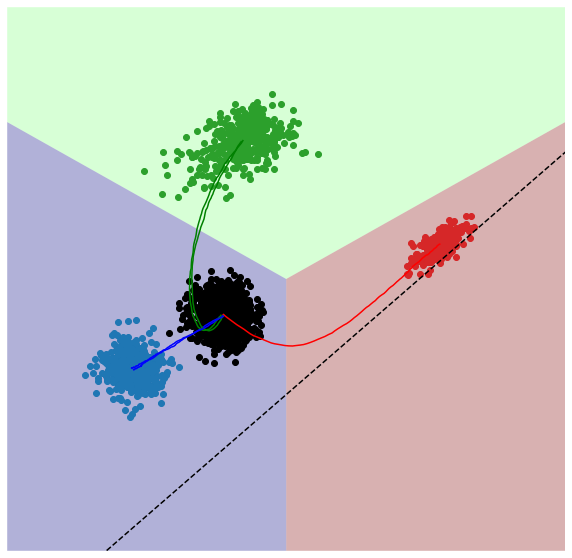

In [13]:
def sigmatwofunc(u):
    sigma = (1 + np.tanh(2*u)) / 2
    return(sigma)

def L2(u): 
    return(sigmatwofunc(n0+np.dot(n1,u)))

nsteps = 100
nit = 200

timepoints = np.linspace(0,1,nsteps)
dt = timepoints[1]


L1 = np.ones(5)
L1[0]=L1[4]=gamma**2
L1[1]=L1[3]=gamma
L1*=l1_lin

Startpoints = np.zeros((nit,5,2))
Endpoints   = np.zeros((nit,5,2))
Trajectories= np.zeros((nit,nsteps,5,2))


R4 = np.zeros((nsteps,2))
R5 = np.zeros((nsteps,2))
R6 = np.zeros((nsteps,2))
R7 = np.zeros((nsteps,2))
R8 = np.zeros((nsteps,2))


for i in range(nit):
    for n in range(0,nsteps): 
        
        if n ==0 : 
            sigma1 = sigmaonefunc(m0)
            R4[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
            R5[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
            R6[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
            R7[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
            R8[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
            #print(R4[0],R5[0],R6[0],R7[0],R8[0],sigma1)
            continue
            
        #Notch signaling
        l2_p4 = alpha * L2(R4[n-1]) + L2(R5[n-1]) 
        l2_p5 = alpha * L2(R5[n-1]) + L2(R4[n-1]) + L2(R6[n-1]) 
        l2_p6 = alpha * L2(R6[n-1]) + L2(R5[n-1]) + L2(R7[n-1]) 
        l2_p7 = alpha * L2(R7[n-1]) + L2(R6[n-1]) + L2(R8[n-1]) 
        l2_p8 = alpha * L2(R8[n-1]) + L2(R7[n-1]) 
        
        sigma1 = sigmaonefunc(f(R4[n-1])+m0+m1*L1[0]+m2*l2_p4)
        eta = np.random.normal(0,np.sqrt(4*D*dt),2)
        R4[n]=R4[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

        sigma1 = sigmaonefunc(f(R5[n-1])+m0+m1*L1[1]+m2*l2_p5)
        eta = np.random.normal(0,np.sqrt(4*D*dt),2)
        R5[n]=R5[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

        sigma1 = sigmaonefunc(f(R6[n-1])+m0+m1*L1[2]+m2*l2_p6)
        eta = np.random.normal(0,np.sqrt(4*D*dt),2)
        R6[n]=R6[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

        sigma1 = sigmaonefunc(f(R7[n-1])+m0+m1*L1[3]+m2*l2_p7)
        eta = np.random.normal(0,np.sqrt(4*D*dt),2)
        R7[n]=R7[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

        sigma1 = sigmaonefunc(f(R8[n-1])+m0+m1*L1[4]+m2*l2_p8)
        eta = np.random.normal(0,np.sqrt(4*D*dt),2)
        R8[n]=R8[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta
        
        
    Startpoints[i] = np.stack((R4[0],R5[0],R6[0],R7[0],R8[0]))
    Endpoints[i] = np.stack((R4[-1],R5[-1],R6[-1],R7[-1],R8[-1]))
    Trajectories[i] = np.stack((R4,R5,R6,R7,R8),axis=2).transpose(0,2,1)
    
fig,ax = plot_voronoi_setup()
plt.scatter(Startpoints[:,:,0],Startpoints[:,:,1],color = 'k')
mean_traj = np.mean(Trajectories,axis=0)
colors = ["blue","green","red","green","blue"]
for i in range(5): 
    plt.plot(mean_traj[:,i,0],mean_traj[:,i,1],color = colors[i])
    plt.scatter(Endpoints[:,i,0],Endpoints[:,i,1],color = "tab:"+colors[i])
    
notch_line = notch_line_fn(-3,3)
plt.plot(notch_line[:,0], notch_line[:, 1], linestyle='--', color='k')

# IV - Predictions : 

### EGF overexpression : 

EGF overexpression can be implemented easily by changing the multiplicative coefficient $l_1^0$ in the expression : 

$l_1 = l_1^0 \times [\gamma^2, \gamma, 1, \gamma, \gamma^2]$ respectively, for $[P4.p,P5.p,P6.p,P7.p,P8.p]$


### __Question 6__

> Integrate and plot the trajectories of the five VPC in the case of EGF overexpressed mutants, replacing $l_1^0$ by $l_1^{\text{over}}$. Compare to the wild-type trajectories.

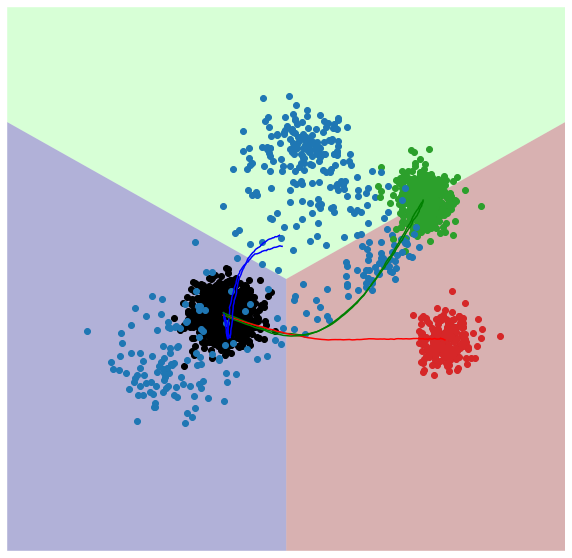

In [14]:
nsteps = 100
nit = 200
timepoints = np.linspace(0,1,nsteps)
dt = timepoints[1]

L1 = np.ones(5)
L1[0]=L1[4]=gamma**2
L1[1]=L1[3]=gamma
L1*=l1_over

Startpoints = np.zeros((nit,5,2))
Endpoints   = np.zeros((nit,5,2))
Trajectories= np.zeros((nit,nsteps,5,2))


R4 = np.zeros((nsteps,2))
R5 = np.zeros((nsteps,2))
R6 = np.zeros((nsteps,2))
R7 = np.zeros((nsteps,2))
R8 = np.zeros((nsteps,2))


for i in range(nit):
    for n in range(0,nsteps): 
        
        if n ==0 : 
            sigma1 = sigmaonefunc(m0)
            R4[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
            R5[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
            R6[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
            R7[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
            R8[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
            #print(R4[0],R5[0],R6[0],R7[0],R8[0],sigma1)
            continue
            
        #Notch signaling
        l2_p4 = alpha * L2(R4[n-1]) + L2(R5[n-1]) 
        l2_p5 = alpha * L2(R5[n-1]) + L2(R4[n-1]) + L2(R6[n-1]) 
        l2_p6 = alpha * L2(R6[n-1]) + L2(R5[n-1]) + L2(R7[n-1]) 
        l2_p7 = alpha * L2(R7[n-1]) + L2(R6[n-1]) + L2(R8[n-1]) 
        l2_p8 = alpha * L2(R8[n-1]) + L2(R7[n-1]) 
        
        sigma1 = sigmaonefunc(f(R4[n-1])+m0+m1*L1[0]+m2*l2_p4)
        eta = np.random.normal(0,np.sqrt(4*D*dt),2)
        R4[n]=R4[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

        sigma1 = sigmaonefunc(f(R5[n-1])+m0+m1*L1[1]+m2*l2_p5)
        eta = np.random.normal(0,np.sqrt(4*D*dt),2)
        R5[n]=R5[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

        sigma1 = sigmaonefunc(f(R6[n-1])+m0+m1*L1[2]+m2*l2_p6)
        eta = np.random.normal(0,np.sqrt(4*D*dt),2)
        R6[n]=R6[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

        sigma1 = sigmaonefunc(f(R7[n-1])+m0+m1*L1[3]+m2*l2_p7)
        eta = np.random.normal(0,np.sqrt(4*D*dt),2)
        R7[n]=R7[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

        sigma1 = sigmaonefunc(f(R8[n-1])+m0+m1*L1[4]+m2*l2_p8)
        eta = np.random.normal(0,np.sqrt(4*D*dt),2)
        R8[n]=R8[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta
        
        
    Startpoints[i] = np.stack((R4[0],R5[0],R6[0],R7[0],R8[0]))
    Endpoints[i] = np.stack((R4[-1],R5[-1],R6[-1],R7[-1],R8[-1]))
    Trajectories[i] = np.stack((R4,R5,R6,R7,R8),axis=2).transpose(0,2,1)
    
fig,ax = plot_voronoi_setup()
plt.scatter(Startpoints[:,:,0],Startpoints[:,:,1],color = 'k')
mean_traj = np.mean(Trajectories,axis=0)
colors = ["blue","green","red","green","blue"]
for i in range(5): 
    plt.plot(mean_traj[:,i,0],mean_traj[:,i,1],color = colors[i])
    plt.scatter(Endpoints[:,i,0],Endpoints[:,i,1],color = "tab:"+colors[i])

### Anchor cell Ablation : 

An in-vivo experiment to test our model is to remove the anchor cell (AC) responsible for EGF induction during the development. This is implemented in our model by putting $l_1^0 = 0$ at one moment during the development (corresponding to the moment where the anchor cell is ablated)

<img src="Images/AC_ablation.png" alt="drawing" width="300"/>

### __Question 7__

> Integrate and plot the trajectories of the five VPC and ablate the anchor cell (AC) at $t=0.4$, replacing $l_1^0$ by $0$. Compare to the wild-type trajectories.

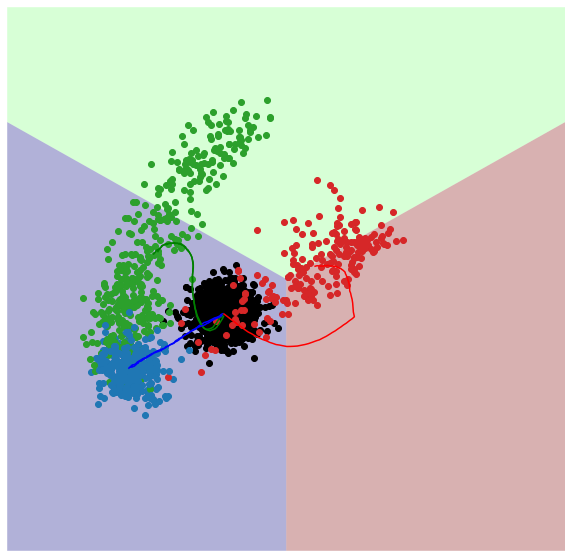

In [15]:
nsteps = 100
nit = 200
timepoints = np.linspace(0,1,nsteps)
dt = timepoints[1]

Startpoints = np.zeros((nit,5,2))
Endpoints   = np.zeros((nit,5,2))
Trajectories= np.zeros((nit,nsteps,5,2))


R4 = np.zeros((nsteps,2))
R5 = np.zeros((nsteps,2))
R6 = np.zeros((nsteps,2))
R7 = np.zeros((nsteps,2))
R8 = np.zeros((nsteps,2))


for i in range(nit):
    
    L1 = np.ones(5)
    L1[0]=L1[4]=gamma**2
    L1[1]=L1[3]=gamma
    L1*=l1_lin

    for n in range(0,nsteps): 
        
        ##Anchor cell ablation at t = 0.4
        if timepoints[n] > 0.4 : 
            L1*=0
            
        if n ==0 : 
            sigma1 = sigmaonefunc(m0)
            R4[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
            R5[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
            R6[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
            R7[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
            R8[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
            #print(R4[0],R5[0],R6[0],R7[0],R8[0],sigma1)
            continue
            
        #Notch signaling
        l2_p4 = alpha * L2(R4[n-1]) + L2(R5[n-1]) 
        l2_p5 = alpha * L2(R5[n-1]) + L2(R4[n-1]) + L2(R6[n-1]) 
        l2_p6 = alpha * L2(R6[n-1]) + L2(R5[n-1]) + L2(R7[n-1]) 
        l2_p7 = alpha * L2(R7[n-1]) + L2(R6[n-1]) + L2(R8[n-1]) 
        l2_p8 = alpha * L2(R8[n-1]) + L2(R7[n-1]) 
        
        sigma1 = sigmaonefunc(f(R4[n-1])+m0+m1*L1[0]+m2*l2_p4)
        eta = np.random.normal(0,np.sqrt(4*D*dt),2)
        R4[n]=R4[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

        sigma1 = sigmaonefunc(f(R5[n-1])+m0+m1*L1[1]+m2*l2_p5)
        eta = np.random.normal(0,np.sqrt(4*D*dt),2)
        R5[n]=R5[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

        sigma1 = sigmaonefunc(f(R6[n-1])+m0+m1*L1[2]+m2*l2_p6)
        eta = np.random.normal(0,np.sqrt(4*D*dt),2)
        R6[n]=R6[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

        sigma1 = sigmaonefunc(f(R7[n-1])+m0+m1*L1[3]+m2*l2_p7)
        eta = np.random.normal(0,np.sqrt(4*D*dt),2)
        R7[n]=R7[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

        sigma1 = sigmaonefunc(f(R8[n-1])+m0+m1*L1[4]+m2*l2_p8)
        eta = np.random.normal(0,np.sqrt(4*D*dt),2)
        R8[n]=R8[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta
        
        
    Startpoints[i] = np.stack((R4[0],R5[0],R6[0],R7[0],R8[0]))
    Endpoints[i] = np.stack((R4[-1],R5[-1],R6[-1],R7[-1],R8[-1]))
    Trajectories[i] = np.stack((R4,R5,R6,R7,R8),axis=2).transpose(0,2,1)
    
fig,ax = plot_voronoi_setup()
plt.scatter(Startpoints[:,:,0],Startpoints[:,:,1],color = 'k')
mean_traj = np.mean(Trajectories,axis=0)
colors = ["blue","green","red","green","blue"]
for i in range(5): 
    plt.plot(mean_traj[:,i,0],mean_traj[:,i,1],color = colors[i])
    plt.scatter(Endpoints[:,i,0],Endpoints[:,i,1],color = "tab:"+colors[i])

### Influence of EGF/Notch Hypomorphs on cell fates : 

We now study the joint influence of reduced level of EGF and Notch. This can again be tested in-vivo, where gene expression can be halved by removing a single allele of the gene. In our model, this can be done by changing the norm of $\vec{m}_1$ (for EGF) and of $\vec{m}_2$ (for Notch). 

$\vec{m} = \vec{m}_0 + l_1 \vec{m}_1 + l_2 \vec{m}_2$

### __Question 8__

> Integrate and plot the trajectories of the five VPC for each hypomorph config listed bellow. Compare to the wild-type trajectories.

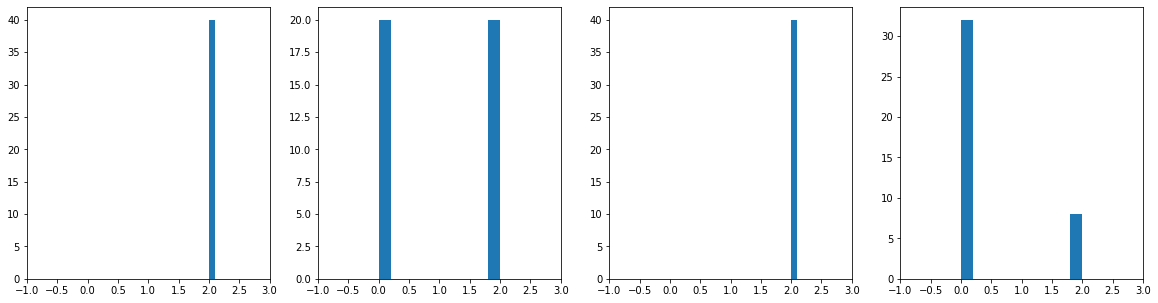

In [16]:
from scipy.spatial import cKDTree

nsteps = 100
nit = 20
timepoints = np.linspace(0,1,nsteps)
dt = timepoints[1]

Startpoints = np.zeros((nit,5,2))
Endpoints   = np.zeros((nit,5,2))
Trajectories= np.zeros((nit,nsteps,5,2))


R4 = np.zeros((nsteps,2))
R5 = np.zeros((nsteps,2))
R6 = np.zeros((nsteps,2))
R7 = np.zeros((nsteps,2))
R8 = np.zeros((nsteps,2))

m1_norm_0=4.60
m2_norm_0=5.97

configs = [{'m1_norm':m1_norm_0,'m2_norm':m2_norm_0},
           {'m1_norm':m1_norm_0/2,'m2_norm':m2_norm_0},
           {'m1_norm':m1_norm_0,'m2_norm':m2_norm_0/2},
           {'m1_norm':m1_norm_0/2,'m2_norm':m2_norm_0/2}]

fig,ax = plt.subplots(1,4,figsize=(20,5))

for j,params in enumerate(configs) : 
    m1_norm, m2_norm = params['m1_norm'], params['m2_norm']
    m1 = m1_norm * stationary[1] / np.linalg.norm(stationary[1])  # EGF signaling
    m2 = m2_norm * stationary[2] / np.linalg.norm(stationary[2])  # Notch signaling
    
    for i in range(nit):
        L1 = np.ones(5)
        L1[0]=L1[4]=gamma**2
        L1[1]=L1[3]=gamma
        L1*=l1_lin

        for n in range(0,nsteps): 

            if n ==0 : 
                sigma1 = sigmaonefunc(m0)
                R4[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
                R5[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
                R6[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
                R7[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
                R8[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
                continue

            #Notch signaling
            l2_p4 = alpha * L2(R4[n-1]) + L2(R5[n-1]) 
            l2_p5 = alpha * L2(R5[n-1]) + L2(R4[n-1]) + L2(R6[n-1]) 
            l2_p6 = alpha * L2(R6[n-1]) + L2(R5[n-1]) + L2(R7[n-1]) 
            l2_p7 = alpha * L2(R7[n-1]) + L2(R6[n-1]) + L2(R8[n-1]) 
            l2_p8 = alpha * L2(R8[n-1]) + L2(R7[n-1]) 

            sigma1 = sigmaonefunc(f(R4[n-1])+m0+m1*L1[0]+m2*l2_p4)
            eta = np.random.normal(0,np.sqrt(4*D*dt),2)
            R4[n]=R4[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

            sigma1 = sigmaonefunc(f(R5[n-1])+m0+m1*L1[1]+m2*l2_p5)
            eta = np.random.normal(0,np.sqrt(4*D*dt),2)
            R5[n]=R5[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

            sigma1 = sigmaonefunc(f(R6[n-1])+m0+m1*L1[2]+m2*l2_p6)
            eta = np.random.normal(0,np.sqrt(4*D*dt),2)
            R6[n]=R6[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

            sigma1 = sigmaonefunc(f(R7[n-1])+m0+m1*L1[3]+m2*l2_p7)
            eta = np.random.normal(0,np.sqrt(4*D*dt),2)
            R7[n]=R7[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

            sigma1 = sigmaonefunc(f(R8[n-1])+m0+m1*L1[4]+m2*l2_p8)
            eta = np.random.normal(0,np.sqrt(4*D*dt),2)
            R8[n]=R8[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta


        Startpoints[i] = np.stack((R4[0],R5[0],R6[0],R7[0],R8[0]))
        Endpoints[i] = np.stack((R4[-1],R5[-1],R6[-1],R7[-1],R8[-1]))
        Trajectories[i] = np.stack((R4,R5,R6,R7,R8),axis=2).transpose(0,2,1)


    
    Tree = cKDTree(stationary)
    pts = Endpoints[:,[1,3],:].reshape(nit*2,2)
    dist, idx = Tree.query(pts)
    ax[j].hist(idx)
    ax[j].set_xlim(-1,3)

We can even go further and plot the frequency of \#2 fates of P5/7 progrenitors with Notch and EGF levels going from the WT levels to zero. This gives us a mutational landscape indicating the frequency of changes of fates of progenitors.

100%|██████████| 400/400 [03:32<00:00,  1.88it/s]


Text(0.5, 1.0, 'Influence of the mutational landscape among Notch/EGF \n hypomorphs on fate frequencies of P5/7 progenitors')

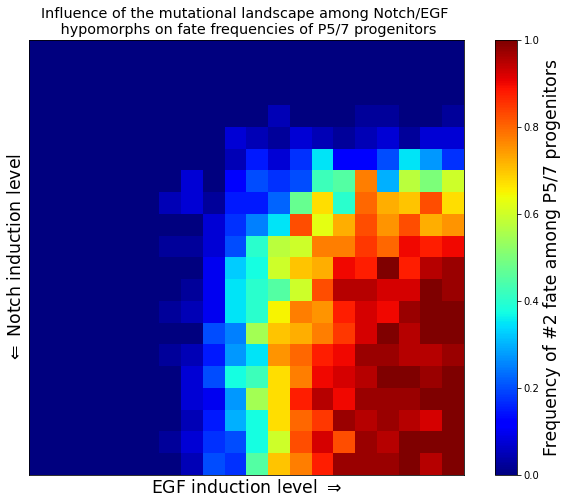

In [17]:
from scipy.spatial import cKDTree
from tqdm import tqdm

nsteps = 100
nit = 20
timepoints = np.linspace(0,1,nsteps)
dt = timepoints[1]


Startpoints = np.zeros((nit,5,2))
Endpoints   = np.zeros((nit,5,2))
Trajectories= np.zeros((nit,nsteps,5,2))


R4 = np.zeros((nsteps,2))
R5 = np.zeros((nsteps,2))
R6 = np.zeros((nsteps,2))
R7 = np.zeros((nsteps,2))
R8 = np.zeros((nsteps,2))

m1_norm_0=4.60
m2_norm_0=5.97

configs = [{'m1_norm':m1_norm_0,'m2_norm':m2_norm_0},
           {'m1_norm':m1_norm_0/2,'m2_norm':m2_norm_0},
           {'m1_norm':m1_norm_0,'m2_norm':m2_norm_0/2},
           {'m1_norm':m1_norm_0/2,'m2_norm':m2_norm_0/2}]

xlist20 = np.linspace(0, 1, 20)
ylist20 = np.linspace(0, 1, 20)
X20, Y20 = np.meshgrid(xlist20, ylist20)
Z20 = np.zeros(X20.shape)

for a, b in tqdm(np.ndindex(X20.shape), total=X20.shape[0]*X20.shape[1]) : 
    
    m1_norm, m2_norm = m1_norm_0*X20[a,b], m2_norm_0*Y20[a,b]
    m1 = m1_norm * stationary[1] / np.linalg.norm(stationary[1])  # EGF signaling
    m2 = m2_norm * stationary[2] / np.linalg.norm(stationary[2])  # Notch signaling
    
    for i in range(nit):
        L1 = np.ones(5)
        L1[0]=L1[4]=gamma**2
        L1[1]=L1[3]=gamma
        L1*=l1_lin

        for n in range(0,nsteps): 

            if n ==0 : 
                sigma1 = sigmaonefunc(m0)
                R4[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
                R5[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
                R6[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
                R7[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
                R8[n] = np.random.normal(0,np.sqrt(2*D*tau),2) + sigma1
                continue

            #Notch signaling
            l2_p4 = alpha * L2(R4[n-1]) + L2(R5[n-1]) 
            l2_p5 = alpha * L2(R5[n-1]) + L2(R4[n-1]) + L2(R6[n-1]) 
            l2_p6 = alpha * L2(R6[n-1]) + L2(R5[n-1]) + L2(R7[n-1]) 
            l2_p7 = alpha * L2(R7[n-1]) + L2(R6[n-1]) + L2(R8[n-1]) 
            l2_p8 = alpha * L2(R8[n-1]) + L2(R7[n-1]) 

            sigma1 = sigmaonefunc(f(R4[n-1])+m0+m1*L1[0]+m2*l2_p4)
            eta = np.random.normal(0,np.sqrt(4*D*dt),2)
            R4[n]=R4[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

            sigma1 = sigmaonefunc(f(R5[n-1])+m0+m1*L1[1]+m2*l2_p5)
            eta = np.random.normal(0,np.sqrt(4*D*dt),2)
            R5[n]=R5[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

            sigma1 = sigmaonefunc(f(R6[n-1])+m0+m1*L1[2]+m2*l2_p6)
            eta = np.random.normal(0,np.sqrt(4*D*dt),2)
            R6[n]=R6[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

            sigma1 = sigmaonefunc(f(R7[n-1])+m0+m1*L1[3]+m2*l2_p7)
            eta = np.random.normal(0,np.sqrt(4*D*dt),2)
            R7[n]=R7[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta

            sigma1 = sigmaonefunc(f(R8[n-1])+m0+m1*L1[4]+m2*l2_p8)
            eta = np.random.normal(0,np.sqrt(4*D*dt),2)
            R8[n]=R8[n-1]*(1-(dt/tau))+(dt/tau)*(sigma1) + eta


        Startpoints[i] = np.stack((R4[0],R5[0],R6[0],R7[0],R8[0]))
        Endpoints[i] = np.stack((R4[-1],R5[-1],R6[-1],R7[-1],R8[-1]))
    
    Tree = cKDTree(stationary)
    pts = Endpoints[:,[1,3],:].reshape(nit*2,2)
    dist, idx = Tree.query(pts)
    freq = len(idx[idx==2])/len(idx)
    Z20[a,b]=freq
    
fig = plt.figure(figsize=(11,8))
heatmap = plt.imshow(Z20,plt.cm.jet)
plt.gca().set_aspect('equal', adjustable='box')
cbar = plt.colorbar(heatmap)
cbar.set_label('Frequency of #2 fate among P5/7 progenitors',**{'fontsize':'xx-large'},rotation=90)
plt.xlabel("EGF induction level $\Rightarrow$", {'fontsize':'xx-large'})
plt.ylabel("$\Leftarrow$ Notch induction level", {'fontsize':'xx-large'})
plt.xticks([], [])
plt.yticks([], [])
plt.title("Influence of the mutational landscape among Notch/EGF \n hypomorphs on fate frequencies of P5/7 progenitors",**{'fontsize':'x-large'})
    

# Conclusion

Development is a dynamical process with competing fates, and it is often hard to visualize the consequences of genetic perturbations. The phenotypic model presented here effectively codifies the genotype-to-phenotype map because the influence of each gene is generally limited to one parameter. Geometric reasoning provides a compact, non-redundant parameterization of signaling and fate specification.

The philosophy of starting with a simplified but global model for developmental patterning meshes well with basic biology : Signaling, commitment, and determination are discrete terms applied to a continuous process. It is unnatural to imagine one model for signaling and another for commitment and determination : the same genes are involved, and the regulation of competence by external signals would fit naturally within our description. A unified model also makes it very simple to incorporate noise, which is a prominent feature of any interesting mutant and of course affects the average trajectories as well as the probabilities of the final states. The existence of a predictive dynamic model should encourage experiments to measure crosses among the available alleles as well as temporal signaling perturbations in mutant backgrounds. Variability in the timing of fate determination is a strong consequence of the flow geometry and should also be measured.

<img src="Images/VPC_picture.png" alt="drawing" width="1000"/>

The model studied describes the experiments and time window of C-Elegans VPC differentiation but not much more. There are no parameters that up-regulate receptors at the beginning of competence or shut down pathways after the first VPC division. From this model, we can say nothing about the differentiation that ensues near the fixed points, which clearly requires additional dimensions. However the fixed points are merely compact ways of creating the simplest parameterizations for the boundaries between them and enumerating the various flow topologies.

